# 数据集2：Oakland Crime Statistics 2011 to 2016

## 1.数据可视化和摘要

两个数据集情况基本一致，唯一不同的是，偶数年份的数据集的地点属性是Location 1，以dict方式显示，奇数年份直接给出了地点字符串。所以在读入数据时，先把偶数年份的数据进行处理，然后把6年的数据合并。

In [1]:
import re
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab

In [2]:
def prefunction2(x):
    re_address = re.compile('"address":"(.*?)"')
    x = re_address.search(x)[1]
    if not x : 
        return np.nan
    else :   
        return x
data2 = pd.DataFrame()
for i in range(1,7):
    file_name = "records-for-201"+str(i)+".csv"
    d_temp = pd.read_csv(file_name,converters={"Location 1":prefunction2})
    d_temp.rename(columns={'Location 1':'Location'},inplace = True)
    d_temp.rename(columns = {'Location ':'Location'},inplace=True)
    data2 = pd.concat([data2,d_temp])
data2

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Agency,Area Id,Beat,Closed Time,Create Time,Event Number,Incident Type Description,Incident Type Id,Location,Priority
0,OP,1,06X,2011-01-01T00:28:17.000,2011-01-01T00:00:00.000,LOP110101000001,POSSIBLE DEAD PERSON,PDOA,ST&SAN PABLO AV,1.0
1,OP,1,07X,2011-01-01T01:12:56.000,2011-01-01T00:01:11.000,LOP110101000002,415 GUNSHOTS,415GS,ST&HANNAH ST,1.0
2,OP,1,10Y,2011-01-01T00:07:20.000,2011-01-01T00:01:25.000,LOP110101000003,415 GUNSHOTS,415GS,ST&MARKET ST,2.0
3,OP,2,21Y,2011-01-01T00:02:28.000,2011-01-01T00:01:35.000,LOP110101000005,415 GUNSHOTS,415GS,PRENTISS ST,2.0
4,OP,2,20X,2011-01-01T00:50:04.000,2011-01-01T00:02:10.000,LOP110101000004,415 GUNSHOTS,415GS,AV&FOOTHILL BLVD,1.0
5,OP,1,08X,2011-01-01T00:07:39.000,2011-01-01T00:02:33.000,LOP110101000006,415 GUNSHOTS,415GS,OAKLAND AV,2.0
6,OP,3,33X,2011-01-01T01:06:26.000,2011-01-01T00:03:03.000,LOP110101000010,415 GUNSHOTS,415GS,B ST,2.0
7,OP,2,24X,2011-01-01T00:04:55.000,2011-01-01T00:04:25.000,LOP110101000011,415 GUNSHOTS,415GS,AV&FOOTHILL BLVD,2.0
8,OP,2,24X,2011-01-01T00:38:54.000,2011-01-01T00:05:13.000,LOP110101000014,415 GUNSHOTS,415GS,AV&FOOTHILL BLVD,2.0
9,OP,3,26Y,2011-01-01T02:53:51.000,2011-01-01T00:05:51.000,LOP110101000013,DISTURBING THE PEACE,415,AV&TEVIS ST,2.0


## 1.1 数据摘要 

### 标称属性
标称属性有Location、Area Id、Beat、Priority、Incident Type Id、Incident Type Description、Event Number。

In [3]:
def get_fluency(x):
    print(x.name+" 属性统计")
    print(x.value_counts())

get_fluency(data2['Location'])
get_fluency(data2['Area Id'])
get_fluency(data2['Beat'])
get_fluency(data2['Priority'])
get_fluency(data2['Incident Type Id'])
get_fluency(data2['Incident Type Description'])
get_fluency(data2['Event Number'])

Location 属性统计
 INTERNATIONAL BLVD             9498
 AV&INTERNATIONAL BLVD          8340
 MACARTHUR BLVD                 7920
INTERNATIONAL BLVD              7371
AV&amp;INTERNATIONAL BLVD       6483
MACARTHUR BLVD                  6147
 BROADWAY                       5915
 FOOTHILL BLVD                  4455
BROADWAY                        4163
 7TH ST                         4038
 TELEGRAPH AV                   3940
 INTERNATIONAL BLVD             3866
FOOTHILL BLVD                   3423
 AV&MACARTHUR BLVD              3305
 ST&BROADWAY                    3215
 FRUITVALE AV                   3199
TELEGRAPH AV                    3196
 ST&TELEGRAPH AV                3134
 MACARTHUR BLVD                 3129
 BANCROFT AV                    3113
 AV&INTERNATIONAL BLVD          3067
 SAN PABLO AV                   3008
 HEGENBERGER RD                 2676
 HIGH ST                        2649
BANCROFT AV                     2535
7TH ST                          2468
 73RD AV                

该数据集无数值属性 
## 1.2 数据可视化
因本数据集中没有数值属性，所以只对部分标称属性进行可视化，分别为Area Id、Priority

Text(0, 0.5, 'Priority')

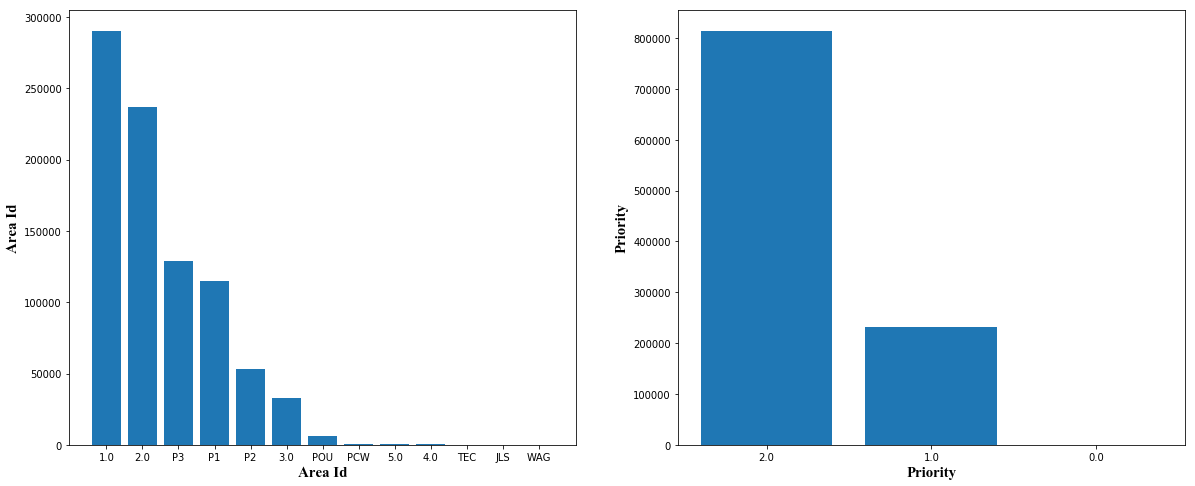

In [4]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
fig,axes = plt.subplots(1,2,figsize=(20,8))
axes[0].bar(range(len(data2['Area Id'].value_counts())),data2['Area Id'].value_counts(),tick_label=data2['Area Id'].value_counts().index)
axes[0].set_xlabel("Area Id",fontdict=font1)
axes[0].set_ylabel("Area Id",fontdict=font1)

axes[1].bar(range(len(data2['Priority'].value_counts())),data2['Priority'].value_counts(),tick_label=data2['Priority'].value_counts().index)
axes[1].set_xlabel("Priority",fontdict=font1)
axes[1].set_ylabel("Priority",fontdict=font1)

由于该数据集无数值属性，所以不再统计数值属性。

## 2. 数据缺失的处理
### 2.1 将缺失部分提出

Text(0, 0.5, 'Priority')

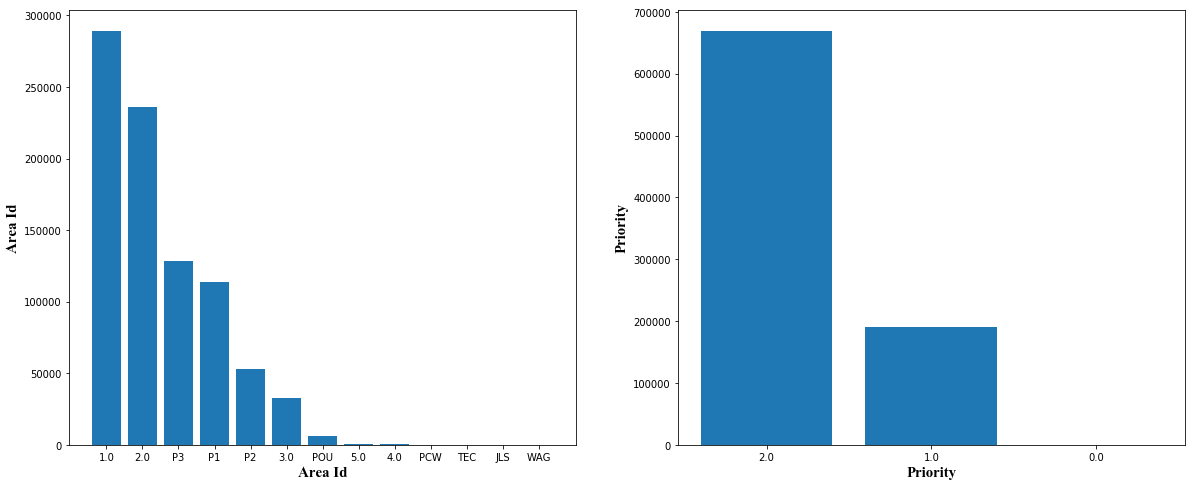

In [5]:
data2_1 = data2.dropna()

fig,axes = plt.subplots(1,2,figsize=(20,8))
axes[0].bar(range(len(data2_1['Area Id'].value_counts())),data2_1['Area Id'].value_counts(),tick_label=data2_1['Area Id'].value_counts().index)
axes[0].set_xlabel("Area Id",fontdict=font1)
axes[0].set_ylabel("Area Id",fontdict=font1)

axes[1].bar(range(len(data2_1['Priority'].value_counts())),data2_1['Priority'].value_counts(),tick_label=data2_1['Priority'].value_counts().index)
axes[1].set_xlabel("Priority",fontdict=font1)
axes[1].set_ylabel("Priority",fontdict=font1)

### 2.2 用最高频率值填补缺失值

Text(0, 0.5, 'Priority')

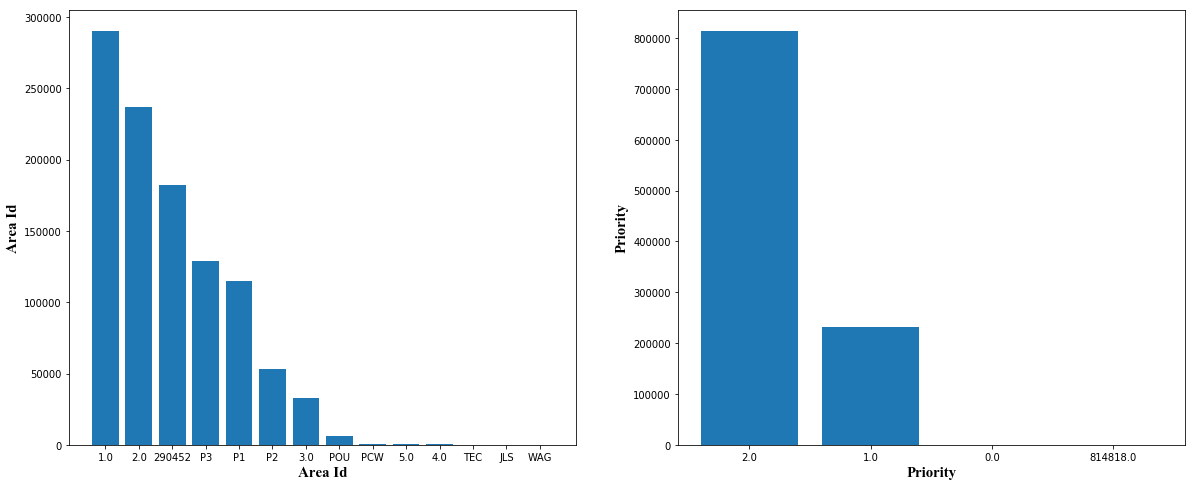

In [6]:
data2_2 = data2.copy()
data2_2['Area Id'].fillna(list(data2_2['Area Id'].value_counts())[0],inplace = True)
data2_2['Priority'].fillna(list(data2_2['Priority'].value_counts())[0],inplace=True)

fig,axes = plt.subplots(1,2,figsize=(20,8))
axes[0].bar(range(len(data2_2['Area Id'].value_counts())),data2_2['Area Id'].value_counts(),tick_label=data2_2['Area Id'].value_counts().index)
axes[0].set_xlabel("Area Id",fontdict=font1)
axes[0].set_ylabel("Area Id",fontdict=font1)

axes[1].bar(range(len(data2_2['Priority'].value_counts())),data2_2['Priority'].value_counts(),tick_label=data2_2['Priority'].value_counts().index)
axes[1].set_xlabel("Priority",fontdict=font1)
axes[1].set_ylabel("Priority",fontdict=font1)